In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros para el estilo de las gráficas
plt.style.use('seaborn-paper')
params = {'figure.figsize' : (14,7),
          'text.usetex'    : True,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'axes.labelsize' : 24,
          'axes.titlesize' : 24,
          'legend.fontsize': 24,
          'lines.linewidth': 3,
          'lines.markersize': 10,
          'grid.color'     : 'darkgray',
          'grid.linewidth' : 0.5,
          'grid.linestyle' : '--',
          'font.family': 'DejaVu Serif',
         }
plt.rcParams.update(params)

In [2]:
def buildMatrix(N, d):
    '''
    Parameters:
    N: int Tamaño de la matriz.
    d: float Contenido de la diagonal.
    '''
    # Matriz de ceros
    A = np.zeros((N,N))
    
    # Primer renglón
    A[0,0] = d
    A[0,1] = -1
    
    # Renglones interiores
    for i in range(1,N-1):
        A[i,i] = d
        A[i,i+1] = -1
        A[i,i-1] = -1
    
    # Último renglón
    A[N-1,N-2] = -1
    A[N-1,N-1] = d
    
    return A

In [10]:
# AGREGA TU CÓDIGO
# Parámetros físicos: L, TA, TB, k, S, w

L = 1.0
TA = 60
TB = 100
k = 1.0
S = 40
w = 2.5 * np.pi

# Parámetros numéricos: N, h, r 

N = 23
h = L / (N + 1)
r = k / h**2


T =  [  60.           89.9610761   110.21859064  118.60312464  114.21676106
   97.52924461   70.32767585   35.52512685   -3.15132568  -41.55974068
  -75.58688182 -101.58871239 -116.78064276 -119.53573778 -109.55894865
  -87.91871028  -56.93252041  -19.918754     19.1587084    56.11498077
   86.99233972  108.48406521  118.28856406  115.35585227  100.        ]


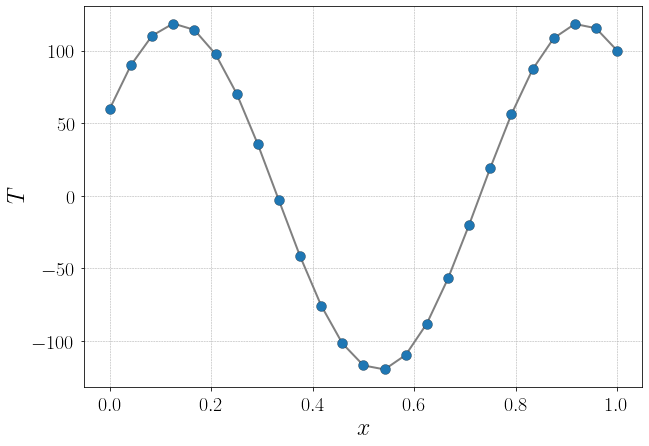

In [11]:
# AGREGA TU CÓDIGO
# Arreglo para almacenar la solución
T = np.zeros(N + 2)
T[0] = TA
T[-1] = TB

# Lado derecho del sistema
b = np.zeros(N)
b[:] = S / r
b[0] += T[0]
b[-1] += T[-1]

# Construcción de la matriz
A = buildMatrix(N, 2- w**2/r)

# Solución del sistema lineal
T[1:N+1]=np.linalg.solve(A,b)

# Impresión y graficación de la solución
print('T = ', T)
x = np.linspace(0, L, N+2)
plt.figure(figsize=(10,7))
plt.plot(x, T, c='grey', lw=2.0)
plt.scatter(x, T, edgecolor='k', zorder= 10)
plt.xlabel('$x$')
plt.ylabel('$T$')
plt.grid()
plt.show()

In [12]:
# Agrega la función: def solExact(x, w):
def solExact(x, w):
    return ((1.0 - np.cos(w)) / np.sin(w)) * np.sin(w * x) + np.cos(w * x)

In [13]:
# Agrega el cálculo del error: 
Error = np.linalg.norm(solExact(x,w) - T, 2)

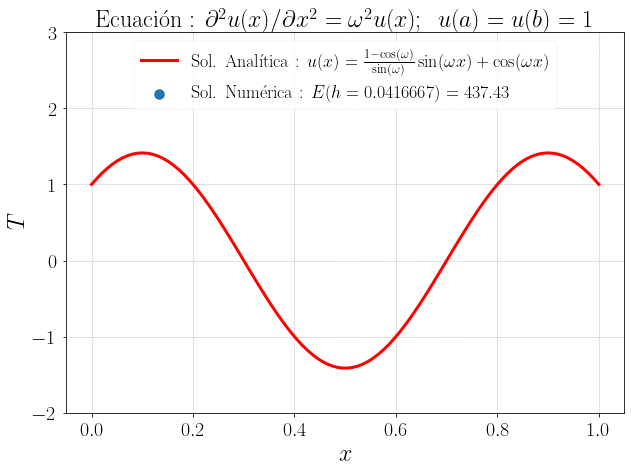

In [14]:
#
# El código siguiente realiza las gráficas usando lo calculado en las celdas anteriores
#
titulo = 'Ecuación : $\partial^2 u(x)/\partial x^2 = \omega^2 u(x); \,\,\, u(a) = u(b) = 1$'
numerica = 'Sol. Numérica : $E(h = %g) = %g$' % (h, Error)
exacta = 'Sol. Analítica : $u(x) = \\frac{1 - \cos(\omega)}{\sin(\omega)} \sin(\omega x) + \cos(\omega x)$'

plt.figure(figsize=(10,7))
xsol = np.linspace(0,1,100)
plt.plot(xsol, solExact(xsol,w),'r-', label=exacta)
plt.scatter(x, T, edgecolor='k', zorder= 10, label=numerica)
plt.title(titulo)
plt.xlabel('$x$')
plt.ylabel('$T$')
plt.ylim(-2.0,3.0)
plt.legend(loc='upper center', fontsize=18)
plt.grid()
plt.savefig('calibracion1_e.pdf')
plt.show()